In [1]:
#Discretizacion del problema. k=Nx.Ny
#vector columna de nx.ny valores.
#matriz de 3x3 (para empezar)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#discretizar el problema
Nx= 10
Ny= 10
beta = Nx/Ny
T_A,T_B,T_C,T_D = (75,0,50,100)
M= np.identity(Nx*Ny)
b= np.zeros((Nx*Ny,1))


In [4]:
Nk= Nx*Ny
for k in range(Nk):
    if k==0:
        b[k]= (T_A+T_B)/2
        
    elif k==(Nx-1):
        b[k]= (T_C+T_B)/2
        
    elif k== (Nk-Nx):
        b[k]= (T_A+T_D)/2
        
    elif k==(Nk-1):
        b[k]= (T_D+T_C)/2
      
    elif k<(Nx-1):
        b[k]= T_B
        
    elif k>(Nk-Nx):
        b[k]= T_D
        
    elif k%Nx==0:
        b[k]= T_A
        
    elif (k+1)%Nx==0:
        b[k]= T_C
     
    else:
        M[k,k]= -2*(1+ beta**2)
        M[k,k-1]= 1
        M[k,k+1]= 1
        M[k,k-Nx]= beta**2
        M[k,k+Nx]= beta**2
        
 

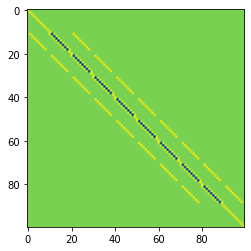

In [5]:
plt.imshow(M)

## Solucion

In [6]:
Temp= np.linalg.solve(M,b)


In [7]:

Temp_plot= Temp.flatten().reshape(Nx,Ny)

<div style="background:#999900"> para poder hacer el plot correctamente necesitamos indicar a imshow que el origen de coordenadas esta en la esquina izquierda inferior: </div>

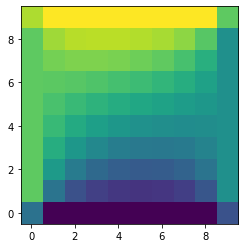

In [8]:
plt.imshow(Temp_plot, origin='lower')

<div style="background:#999900">Otra forma de hacer el gráfico es usando contornos o curvas de nivel. en el siguiente ejemplo usamod dos veces para obtener los niveles sólidos y las curvas de nivel por separado:</div>

<div style="background:#999900">y por favor, agranden los gráficos !</div>

In [13]:
plt.rc('figure', figsize=(15,8))
plt.rc('font', size=22)

Text(0, 0.5, 'j')

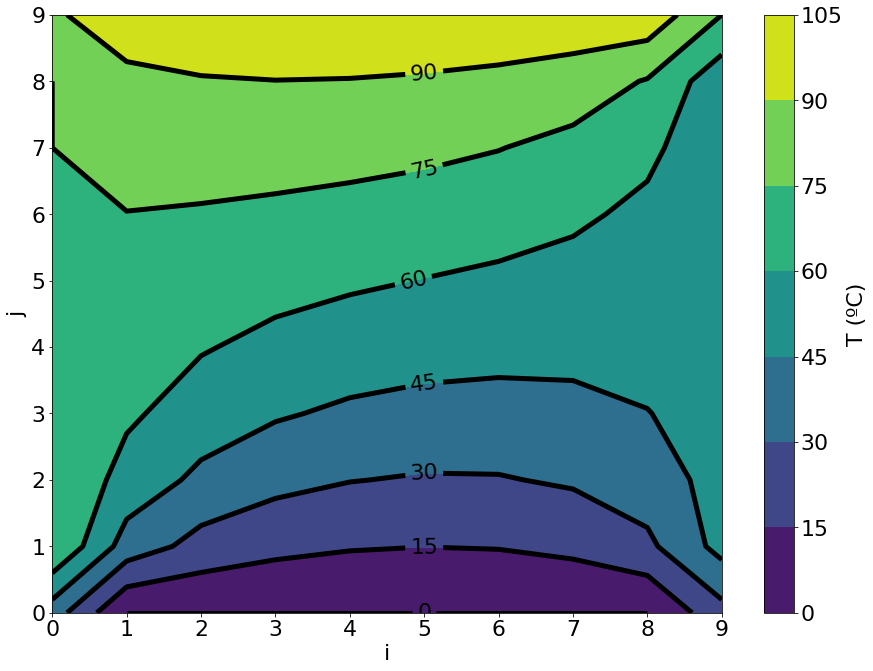

In [22]:
fig, ax = plt.subplots(figsize=(15,11))
mappable = ax.contourf(Temp_plot)
levels = ax.contour(Temp_plot, colors='k', linewidths=5)
cbar = plt.colorbar(mappable)
cbar.set_label('T (ºC)')
ax.clabel(levels, )
ax.set_xlabel('i')
ax.set_ylabel('j')